GOAL: Elite Classifier basing on User Basic Information 

Models to Compare On: 

    -Logistic Regression

    -Random Forest

    -Gradient Boosting

    -AdaBoost Classifier
    
    - Support vector machines.



In [1]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from collections import Counter
from collections import defaultdict
from confusion_mat import show_confusion_matrix


# Evaluation - Optimization Tools
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,confusion_matrix, classification_report
from sklearn.preprocessing import normalize, scale, StandardScaler, Normalizer
from sklearn.grid_search import GridSearchCV

# Classification Algorithms
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier


Populating the interactive namespace from numpy and matplotlib


/Users/Charlotte/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Charlotte/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
user = pd.read_pickle('data/user')

In [3]:
user.columns

Index(['yelping_since', 'compliments_plain', 'review_count',
       'compliments_cute', 'compliments_writer', 'fans', 'compliments_note',
       'compliments_hot', 'compliments_cool', 'compliments_profile',
       'average_stars', 'compliments_more', 'elite', 'user_id', 'votes_cool',
       'compliments_list', 'votes_funny', 'compliments_photos',
       'compliments_funny', 'votes_useful', 'yelping_period', 'elite_status',
       'n_friends', 'tip_count', 'compliments'],
      dtype='object')

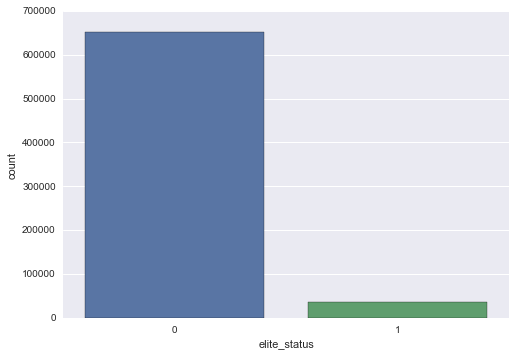

In [5]:
sns.countplot(user['elite_status'])

# Feature Selection 

In [4]:
# use all features given in user information 
all_features = [ 'compliments_plain', 'review_count',
       'compliments_cute', 'compliments_writer', 'fans', 'compliments_note',
       'compliments_hot', 'compliments_cool', 'compliments_profile',
       'average_stars', 'compliments_more', 'votes_cool',
       'compliments_list', 'votes_funny', 'compliments_photos',
       'compliments_funny', 'votes_useful', 'yelping_period', 
       'n_friends', 'tip_count']

In [5]:
X_original = user[all_features]
y_original= user.elite_status
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original,y_original,test_size=0.2)
scale = StandardScaler()
X_train_original = scale.fit_transform(X_train_original)
X_test_original= scale.fit_transform(X_test_original)

In [6]:
# combine all compliments into one 
features = [ 'review_count','fans', 'average_stars','yelping_period','n_friends','tip_count',
            'votes_cool','votes_funny', 'votes_useful', 'compliments']
X_1 = user[features]
y_1 = user.elite_status
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size=0.2)
X_train_1 = scale.fit_transform(X_train_1)
X_test_1 = scale.fit_transform(X_test_1)

# Select Best Models

In [91]:
def cross_val(models,X_train,y_train):
    for model in models:
        model.fit(X_train,y_train)
        
        print(str(model).split('(')[0],'CV:')
        print('-- Accuracy:', round((cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy').mean()), 3),
              '| Recall:', round(cross_val_score(model, X_train, y_train, cv=5, scoring='recall').mean(), 3),
              '| Precision:', round(cross_val_score(model, X_train, y_train, cv=5, scoring='precision').mean(), 3),
              '| f1:', round(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean(), 3),
             '| auc:',round(cross_val_score(model, X_train, y_train, cv=5, scoring= 'roc_auc').mean(), 3))
            

In [27]:
clf = [LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),
      DecisionTreeClassifier(),SGDClassifier()]

<img src="http://i.giphy.com/l0MYv5EjWCxRt7ONy.gif">

In [13]:
# Warning: This takes a long time to run. So run it and go get a coffee!

In [14]:
# CV of combined compliment features
cross_val(clf,X_train_1,y_train_1)

LogisticRegression CV:
-- Accuracy: 0.974 | Recall: 0.602 | Precision: 0.847 | f1: 0.704 | auc: 0.987
RandomForestClassifier CV:
-- Accuracy: 0.979 | Recall: 0.726 | Precision: 0.84 | f1: 0.779 | auc: 0.976
AdaBoostClassifier CV:
-- Accuracy: 0.979 | Recall: 0.778 | Precision: 0.81 | f1: 0.794 | auc: 0.992
DecisionTreeClassifier CV:
-- Accuracy: 0.97 | Recall: 0.724 | Precision: 0.708 | f1: 0.717 | auc: 0.854
SGDClassifier CV:
-- Accuracy: 0.975 | Recall: 0.617 | Precision: 0.867 | f1: 0.71 | auc: 0.979


In [ ]:
# CV of all features
cross_val(clf,X_train_orginal,y_train_orginal)

In [ ]:
LogisticRegression CV:
-- Accuracy: 0.971 | Recall: 0.568 | Precision: 0.824 | f1: 0.672 | auc: 0.985
RandomForestClassifier CV:
-- Accuracy: 0.978 | Recall: 0.72 | Precision: 0.828 | f1: 0.769 | auc: 0.973
AdaBoostClassifier CV:
-- Accuracy: 0.978 | Recall: 0.769 | Precision: 0.796 | f1: 0.782 | auc: 0.991
DecisionTreeClassifier CV:
-- Accuracy: 0.969 | Recall: 0.712 | Precision: 0.698 | f1: 0.704 | auc: 0.847
SGDClassifier CV:
-- Accuracy: 0.972 | Recall: 0.545 | Precision: 0.862 | f1: 0.676 | auc: 0.98

>## AdaBoostClassifier and RandomForestClassifier are selected 
### to model because they have the highest score for accuracy, recall and precision and f1 out of all the estimators 

<img src="http://i.giphy.com/xThuW5uXxjViPOlLWw.gif">

# Tunning Models

In [32]:
test = user.sample(frac=0.02, replace=False) #14k

In [39]:
X_gs = test[all_features]
y_gs = test.elite_status
X_gs = scale.fit_transform(X_gs)

In [71]:
def gs_rf(X_train,y_train):

    param =  [{'max_features': [8,10,12],'max_depth': [10,15,16], 
                     'n_estimators' : [300,500] }]
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid = param, verbose = 3, cv = 3,n_jobs= -1, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    output =  [grid_search.best_score_,grid_search.best_params_]
    
        
    return output  
                   

In [72]:
rf_1 = gs_rf(X_gs,y_gs)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] n_estimators=300, max_depth=10, max_features=8 ..................
[CV] n_estimators=300, max_depth=10, max_features=8 ..................
[CV] n_estimators=300, max_depth=10, max_features=8 ..................
[CV] n_estimators=500, max_depth=10, max_features=8 ..................
[CV]  n_estimators=300, max_depth=10, max_features=8, score=0.979899 -   5.9s
[CV] n_estimators=500, max_depth=10, max_features=8 ..................
[CV]  n_estimators=300, max_depth=10, max_features=8, score=0.980122 -   6.3s
[CV]  n_estimators=300, max_depth=10, max_features=8, score=0.978584 -   6.2s
[CV] n_estimators=500, max_depth=10, max_features=8 ..................
[CV] n_estimators=300, max_depth=10, max_features=10 .................
[CV]  n_estimators=500, max_depth=10, max_features=8, score=0.980122 -  10.4s
[CV] n_estimators=300, max_depth=10, max_features=10 .................
[CV]  n_estimators=300, max_depth=10, max_features=10, scor

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   44.9s


[CV]  n_estimators=500, max_depth=15, max_features=8, score=0.979458 -   6.6s
[CV] n_estimators=500, max_depth=15, max_features=10 .................
[CV]  n_estimators=300, max_depth=15, max_features=10, score=0.978370 -   4.5s
[CV] n_estimators=500, max_depth=15, max_features=10 .................
[CV]  n_estimators=300, max_depth=15, max_features=10, score=0.978365 -   4.5s
[CV] n_estimators=300, max_depth=15, max_features=12 .................
[CV]  n_estimators=500, max_depth=15, max_features=10, score=0.980778 -   7.5s
[CV] n_estimators=300, max_depth=15, max_features=12 .................
[CV]  n_estimators=500, max_depth=15, max_features=10, score=0.979244 -   7.3s
[CV] n_estimators=300, max_depth=15, max_features=12 .................
[CV]  n_estimators=500, max_depth=15, max_features=10, score=0.978802 -   7.4s
[CV] n_estimators=500, max_depth=15, max_features=12 .................
[CV]  n_estimators=300, max_depth=15, max_features=12, score=0.980559 -   5.2s
[CV] n_estimators=500,

[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  1.5min finished


In [74]:
rf_1

[0.9801179812103998,
 {'max_depth': 10, 'max_features': 10, 'n_estimators': 300}]

In [77]:
def gs_abc(X_train,y_train):
    param = [{'learning_rate': [0.3,0.5,0.8,1],'n_estimators': [100,500,800]}]
    grid_search = GridSearchCV(AdaBoostClassifier(), param_grid = param, verbose = 1, cv = 3,n_jobs= -1, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    param = [grid_search.best_score_, grid_search.best_params_ ]
    return  param


In [78]:
abc_1 = gs_abc(X_gs,y_gs)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   59.3s finished


In [79]:
abc_1 

[0.9790255625955866, {'learning_rate': 0.3, 'n_estimators': 100}]

In [94]:
abc_1

defaultdict(list,
            {'accuracy': (0.8261497288541446,
              {'learning_rate': 0.8, 'n_estimators': 800}),
             'f1': (0.8156364736219641,
              {'learning_rate': 0.8, 'n_estimators': 800}),
             'precision': (0.8187658548023466,
              {'learning_rate': 0.8, 'n_estimators': 800}),
             'recall': (0.8129603337782988,
              {'learning_rate': 0.8, 'n_estimators': 500})})

# Apply Models to Testing Dataset

In [7]:
def plot_roc(y_test, pred_test):
    fpr, tpr, _= roc_curve(y_test, pred_test)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr, label = 'area %.2f' %roc_auc)
    plt.plot(np.linspace(0,1,10),np.linspace(0,1,10))
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.legend(loc = 'lower right')
    plt.show()

In [36]:
def fit_model(model,features,X_train,y_train,X_test,y_test):
    "Fit Model --- Return Evaluation Metrics"
    
    model = model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    prob = model.predict_proba(X_test)
    
    print(str(model).split('(')[0],':')
    print('Train | Accuracy:', round(accuracy_score(y_train, train_pred),3),
          '| Recall',round(recall_score(y_train, train_pred),3),
          '| Precision',round(precision_score(y_train, train_pred),3),
          '| f1',round(f1_score(y_train, train_pred),3))

    print('Test | Accuracy:', round(accuracy_score(y_test, test_pred),3),
          '| Recall',round(recall_score(y_test, test_pred),3),
          '| Precision',round(precision_score(y_test, test_pred),3),
          '| f1',round(f1_score(y_test, test_pred),3))
    
    feature_importances = model.feature_importances_
    feature_indices = np.argsort(feature_importances)[::-1]
    print(' ')
    print('Features Importance Order')
    for f,index in enumerate(feature_indices):
        print("%2d) %-*s %f" % (f + 1, 30,features[index], feature_importances[index]))
    return test_pred, prob[:,1]


### Random Forest

In [37]:
rf = RandomForestClassifier(max_depth= 15, max_features = 8, n_estimators = 300)

In [38]:
'RF - combined compliments'
combined_rf_pred,combined_rf_prob = fit_model(rf,features,X_train_1,y_train_1,X_test_1,y_test_1)

RandomForestClassifier :
Train | Accuracy: 0.992 | Recall 0.911 | Precision 0.927 | f1 0.919
Test | Accuracy: 0.979 | Recall 0.757 | Precision 0.83 | f1 0.792
 
Features Importance Order
 1) compliments                    0.548838
 2) votes_cool                     0.142948
 3) review_count                   0.106185
 4) votes_useful                   0.046041
 5) yelping_period                 0.041479
 6) average_stars                  0.032962
 7) n_friends                      0.029213
 8) votes_funny                    0.027122
 9) fans                           0.015679
10) tip_count                      0.009534


In [11]:
'RF - all features'
all_rf_pred,all_rf_prob = fit_model(rf,all_features,X_train_original,y_train_original,X_test_original,y_test_original) #2:43 

RandomForestClassifier :
Train | Accuracy: 0.992 | Recall 0.901 | Precision 0.947 | f1 0.924
Test | Accuracy: 0.981 | Recall 0.789 | Precision 0.834 | f1 0.811
 
Features Importance Order
 1) votes_cool                     0.266432
 2) compliments_cool               0.187547
 3) review_count                   0.114862
 4) compliments_writer             0.106368
 5) votes_useful                   0.098683
 6) compliments_hot                0.039513
 7) yelping_period                 0.034065
 8) votes_funny                    0.024300
 9) n_friends                      0.022835
10) average_stars                  0.021631
11) fans                           0.019316
12) compliments_plain              0.018093
13) compliments_note               0.009060
14) compliments_more               0.008399
15) compliments_funny              0.007510
16) tip_count                      0.006501
17) compliments_photos             0.005409
18) compliments_profile            0.003988
19) compliments_cute

### AdaBoost Classfier

In [12]:
ada = AdaBoostClassifier(learning_rate=0.8,n_estimators=500) # 2:54

In [13]:
'AdaBoost all features'
all_ada_pred,all_ada_prob = fit_model(ada,all_features,X_train_original,y_train_original,X_test_original,y_test_original) #2:10 

AdaBoostClassifier :
Train | Accuracy: 0.98 | Recall 0.784 | Precision 0.826 | f1 0.805
Test | Accuracy: 0.978 | Recall 0.82 | Precision 0.765 | f1 0.792
 
Features Importance Order
 1) review_count                   0.192000
 2) average_stars                  0.096000
 3) votes_useful                   0.096000
 4) compliments_writer             0.070000
 5) votes_cool                     0.070000
 6) compliments_cool               0.060000
 7) votes_funny                    0.054000
 8) compliments_hot                0.052000
 9) yelping_period                 0.050000
10) fans                           0.032000
11) compliments_cute               0.030000
12) n_friends                      0.030000
13) compliments_plain              0.028000
14) compliments_photos             0.028000
15) compliments_funny              0.024000
16) compliments_note               0.022000
17) compliments_more               0.022000
18) compliments_profile            0.018000
19) tip_count             

In [14]:
'AdaBoost Combined Compliments'
combined_ada_pred,combined_ada_prob = fit_model(ada,features,X_train_1,y_train_1,X_test_1,y_test_1)

AdaBoostClassifier :
Train | Accuracy: 0.979 | Recall 0.778 | Precision 0.809 | f1 0.793
Test | Accuracy: 0.978 | Recall 0.766 | Precision 0.818 | f1 0.791
 
Features Importance Order
 1) review_count                   0.250000
 2) compliments                    0.156000
 3) votes_useful                   0.138000
 4) average_stars                  0.100000
 5) votes_funny                    0.096000
 6) tip_count                      0.066000
 7) votes_cool                     0.062000
 8) yelping_period                 0.062000
 9) fans                           0.036000
10) n_friends                      0.034000


In [41]:
rf_confusion = confusion_matrix(y_test_1, all_rf_pred )
ada_confusion = confusion_matrix(y_test_1, all_ada_pred )

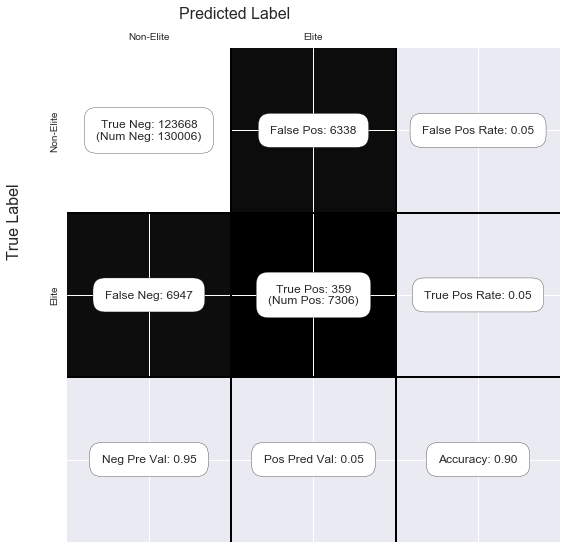

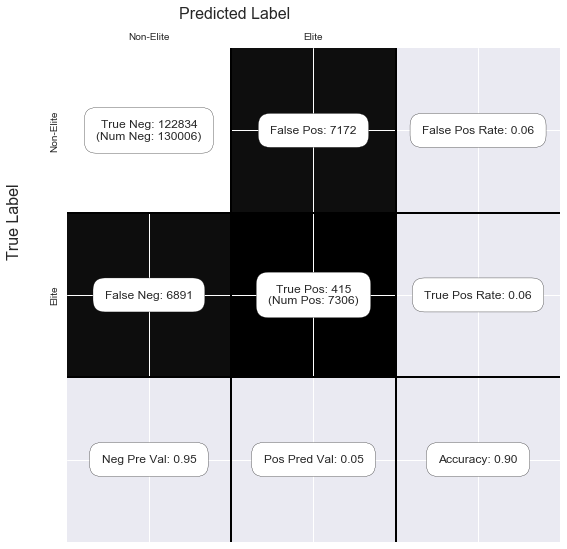

In [43]:
show_confusion_matrix(rf_confusion,class_labels=["Non-Elite", "Elite"])
show_confusion_matrix(ada_confusion,class_labels=["Non-Elite", "Elite"])

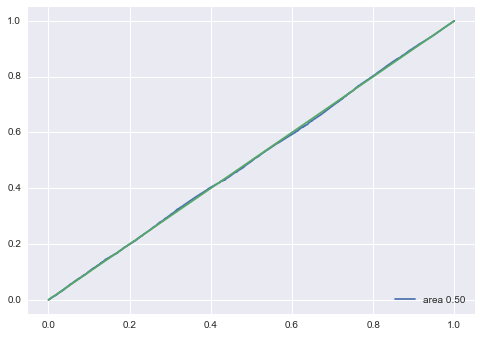

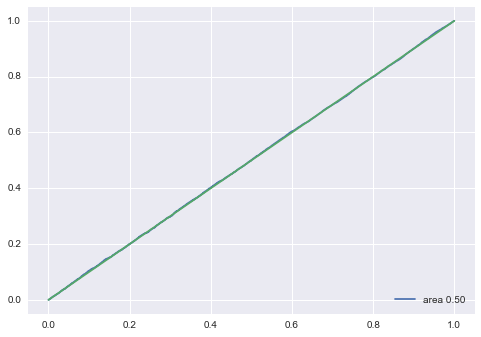

In [17]:
plot_roc(y_test_1, all_rf_prob )
plot_roc(y_test_1, all_ada_prob )

# Different dataset

> ## We see earlier that number of reviews is a good indicator for elite users. If increasing the threshold for user reviews, I want to test how good the model predicts for elite status. 

In [93]:
user_40 = user.ix[user['review_count'] > 50]

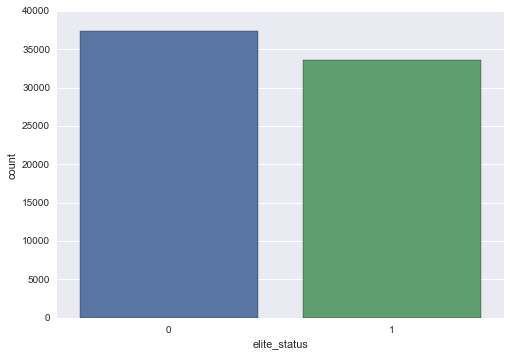

In [94]:
sns.countplot(user_40['elite_status'])

In [95]:
X_40 = user_40[features]
y_40 = user_40.elite_status
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X_40,y_40,test_size=0.2)
X_train_40 = scale.fit_transform(X_train_40)
X_test_40 = scale.fit_transform(X_test_40)

In [96]:
'Calculate Baseline'
round(100 - (y_40.mean() * 100),2)

52.67

In [97]:
new_clf = [RandomForestClassifier(),AdaBoostClassifier()]

In [98]:
cross_val(new_clf,X_train_40,y_train_40)

RandomForestClassifier CV:
-- Accuracy: 0.813 | Recall: 0.763 | Precision: 0.829 | f1: 0.795 | auc: 0.887
AdaBoostClassifier CV:
-- Accuracy: 0.82 | Recall: 0.81 | Precision: 0.811 | f1: 0.81 | auc: 0.9


In [99]:
rf_40 = RandomForestClassifier(max_depth= 15,max_features= 8, n_estimators = 500)
ada_40 = AdaBoostClassifier(learning_rate=0.5,n_estimators =800)
esb = VotingClassifier(estimators=[('rf', rf_40), ('ada', ada_40)], voting='hard')

# Fit model 

In [115]:
rf_pred_40,rf_prob_40 = fit_model(rf_40,features,X_train_40,y_train_40,X_test_40, y_test_40)

RandomForestClassifier :
Train | Accuracy: 0.944 | Recall 0.946 | Precision 0.936 | f1 0.941
Test | Accuracy: 0.777 | Recall 0.602 | Precision 0.887 | f1 0.717
 
Features Importance Order
 1) compliments                    0.458598
 2) votes_cool                     0.127252
 3) yelping_period                 0.070935
 4) review_count                   0.069237
 5) votes_useful                   0.063411
 6) average_stars                  0.061801
 7) n_friends                      0.052765
 8) votes_funny                    0.048990
 9) fans                           0.029842
10) tip_count                      0.017169


In [104]:
ada_pred_40,ada_prob_40 = fit_model(ada_40,features,X_train_40,y_train_40, X_test_40, y_test_40) 

AdaBoostClassifier :
Train | Accuracy: 0.827 | Recall 0.815 | Precision 0.82 | f1 0.817
Test | Accuracy: 0.769 | Recall 0.571 | Precision 0.903 | f1 0.699
 
Features Importance Order
 1) votes_useful                   0.167500
 2) compliments                    0.165000
 3) votes_cool                     0.157500
 4) votes_funny                    0.135000
 5) review_count                   0.086250
 6) average_stars                  0.083750
 7) n_friends                      0.080000
 8) yelping_period                 0.053750
 9) fans                           0.051250
10) tip_count                      0.020000


In [112]:
esb_pred = fit_model(esb,features, X_train_40,y_train_40, X_test_40, y_test_40) 

VotingClassifier :
Train | Accuracy: 0.881 | Recall 0.815 | Precision 0.926 | f1 0.867
Test | Accuracy: 0.764 | Recall 0.549 | Precision 0.913 | f1 0.686


In [119]:
rf_confusion = confusion_matrix(y_test_40, rf_pred_40 )
ada_confusion = confusion_matrix(y_test_40, ada_pred_40 )
esb_confusion = confusion_matrix(y_test_40, esb_pred )

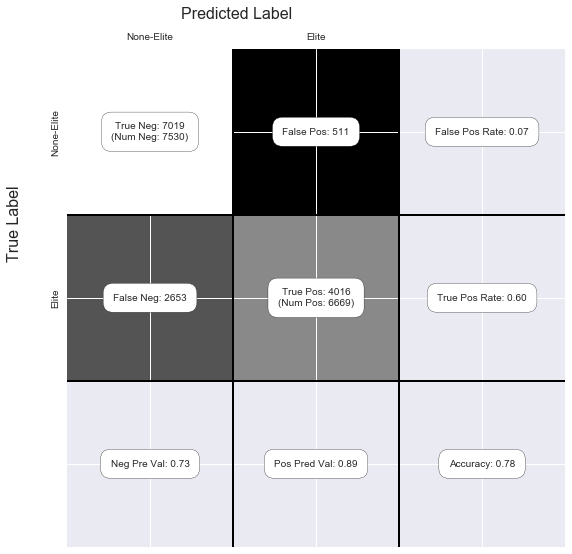

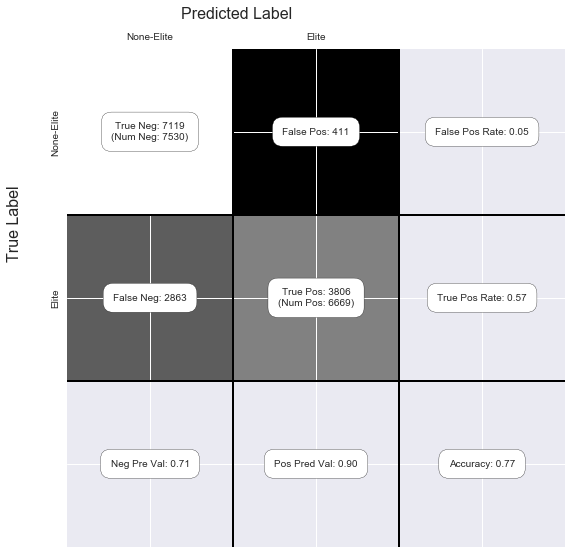

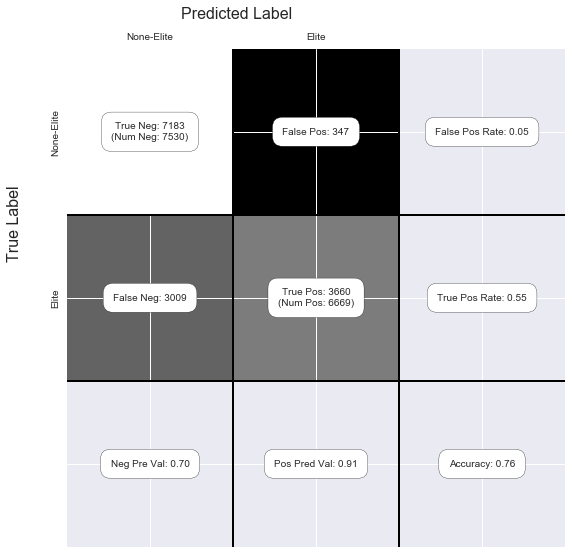

In [121]:
show_confusion_matrix(rf_confusion,class_labels=["Non-Elite", "Elite"])
show_confusion_matrix(ada_confusion,class_labels=["Non-Elite", "Elite"])
show_confusion_matrix(esb_confusion,class_labels=["Non-Elite", "Elite"])

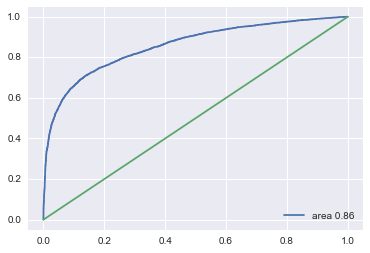

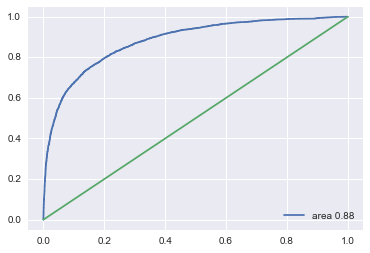

In [123]:
plot_roc(y_test_40, rf_prob_40 )
plot_roc(y_test_40, ada_prob_40 )